# ML1 - 1.5 Supervised Learning Algorithms Part 2 - A) Decision Tree

### This script contains the following:

## A) Decision Tree
#### 1. Importing Libraries
#### 2. Data Cleaning
#### 3. Decision Tree
        Confusion Matrix
        Pruning original DT
        Debilt DT
        Kassel DT
        Oslo DT
        Stockholm DT
        Valentia DT
        Regression
#### 4. Export
## B) Artificial Neural Networks (ANN)
#### 1. Importing Libraries
#### 2. Data Cleaning
#### 3. Artificial Neural Networks (ANN)
#### 4. Export

### 1. Importing Libraries

In [5]:
# Importing Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import graphviz
from sklearn import datasets
from sklearn import metrics
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure

In [6]:
# Importing ClimateWins scaled data.

climatewins = pd.read_pickle(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 1 - Basics of Machine Learning for Analysts\ClimateWins\Prepared Python Files\ML1 1.4_scaled.pkl')

In [7]:
# Importing pleasant weater dataset

pleasant_weather = pd.read_csv(r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 1 - Basics of Machine Learning for Analysts\ClimateWins\DataSet\Dataset-Answers-Weather_Prediction_Pleasant_Weather.csv')

In [8]:
# Creating Path

path = r'D:\Career Foundry\3) Data Specialization\Machine Learning with Python\Achievement 1 - Basics of Machine Learning for Analysts'

In [9]:
path

'D:\\Career Foundry\\3) Data Specialization\\Machine Learning with Python\\Achievement 1 - Basics of Machine Learning for Analysts'

### 2. Data Cleaning

In [11]:
climatewins.head()

BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
0           0.660514          -0.02793        0.826097       -0.001949   
1           0.244897          -0.02793        0.735760       -0.001949   
2           1.076130          -0.02793        1.277781       -0.001949   
3          -1.001953          -0.02793        1.458455       -0.001949   
4           0.244897          -0.02793        1.729466       -0.001949   

   BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
0               -1.101066            -0.265148         -0.179228   
1               -1.058108             1.658760         -0.179228   
2               -1.251420             0.155707         -0.179228   
3               -0.821838            -0.445514         -0.179228   
4               -0.746661            -0.164944         -0.179228   

   BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_cloud_cover  \
0       -0.902918        -0.528623       -0.845652  ...             -0.443701   
1       -0.810126        -0.582946       -0.462450  ...              0.783085   
2       -1.065304        -0.257010       -0.186545  ...              0.783085   
3       -0.114186        -0.555784       -0.385810  ...              0.783085   
4        0.187388        -1.003946       -1.075573  ...             -1.670486   

   VALENTIA_humidity  VALENTIA_pressure  VALENTIA_global_radiation  \
0           0.761754          -1.299744                  -0.806427   
1           1.183580          -1.262455                  -1.042055   
2           1.183580          -0.432779                  -1.136306   
3           0.480538           0.387574                  -1.183432   
4          -0.363113           1.729970                  -0.794645   

   VALENTIA_precipitation  VALENTIA_snow_depth  VALENTIA_sunshine  \
0               -0.088407            -0.024706           0.372147   
1                0.503361            -0.024706          -0.829285   
2               -0.396127            -0.024706          -1.009500   
3                0.669056            -0.024706          -1.039536   
4               -0.490810            -0.024706           0.672505   

   VALENTIA_temp_mean  VALENTIA_temp_min  VALENTIA_temp_max  
0           -0.668215          -0.519743          -0.752237  
1           -0.548046          -0.629054          -0.407141  
2           -0.067372           0.054135          -0.177078  
3           -0.998679          -0.164486          -0.838511  
4           -1.509396          -1.339569          -1.471186  

[5 rows x 147 columns]

In [12]:
column_names = climatewins.columns.tolist()

In [13]:
column_names

['BASEL_cloud_cover',
 'BASEL_wind_speed',
 'BASEL_humidity',
 'BASEL_pressure',
 'BASEL_global_radiation',
 'BASEL_precipitation',
 'BASEL_snow_depth',
 'BASEL_sunshine',
 'BASEL_temp_mean',
 'BASEL_temp_min',
 'BASEL_temp_max',
 'BELGRADE_cloud_cover',
 'BELGRADE_humidity',
 'BELGRADE_pressure',
 'BELGRADE_global_radiation',
 'BELGRADE_precipitation',
 'BELGRADE_sunshine',
 'BELGRADE_temp_mean',
 'BELGRADE_temp_min',
 'BELGRADE_temp_max',
 'BUDAPEST_cloud_cover',
 'BUDAPEST_humidity',
 'BUDAPEST_pressure',
 'BUDAPEST_global_radiation',
 'BUDAPEST_precipitation',
 'BUDAPEST_sunshine',
 'BUDAPEST_temp_mean',
 'BUDAPEST_temp_min',
 'BUDAPEST_temp_max',
 'DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'DUSSELDORF_cloud_cover',
 'DUSSELDORF_wind_speed',
 'DUSSELDORF_humidity',
 'DUSSELDORF_pressure',
 'DUSSELDORF_global_

In [14]:
climatewins.shape

(22950, 147)

In [15]:
column_names_pw = pleasant_weather.columns.tolist()

In [16]:
column_names_pw

['DATE',
 'BASEL_pleasant_weather',
 'BELGRADE_pleasant_weather',
 'BUDAPEST_pleasant_weather',
 'DEBILT_pleasant_weather',
 'DUSSELDORF_pleasant_weather',
 'HEATHROW_pleasant_weather',
 'KASSEL_pleasant_weather',
 'LJUBLJANA_pleasant_weather',
 'MAASTRICHT_pleasant_weather',
 'MADRID_pleasant_weather',
 'MUNCHENB_pleasant_weather',
 'OSLO_pleasant_weather',
 'SONNBLICK_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']

In [17]:
pleasant_weather.shape

(22950, 16)

##### Comparing the column names for both the climatewins dataset and pleasant_weather dataset, the original columns containing GDANSK, ROMA and TOURS weather stations have already been removed. DATE and MONTH are also removed from the climatewins dataset.
##### In additon DATE and SONNBLICK will be dropped from the pleasant_weather dataset and all the SONNBLICK columns will be dropped from climatewins dataset since we addressed that all weather in SONNBLICK is unpleasant in ML1 1.4.

In [19]:
# Dropping the 'DATE' column from pleasant_weather now being renamed to pleasant_w.

pleasant_w = pleasant_weather.drop(columns = ['DATE','SONNBLICK_pleasant_weather'])

In [20]:
pleasant_w.shape

(22950, 14)

In [21]:
# Dropping the 'SONNBLICK' columnS from climatewins now being renamed to climatewins_d.

climatewins_d = climatewins.drop(columns = ['SONNBLICK_cloud_cover',
 'SONNBLICK_wind_speed',
 'SONNBLICK_humidity',
 'SONNBLICK_pressure',
 'SONNBLICK_global_radiation',
 'SONNBLICK_precipitation',
 'SONNBLICK_sunshine',
 'SONNBLICK_temp_mean',
 'SONNBLICK_temp_min',
 'SONNBLICK_temp_max'])

In [22]:
climatewins_d.shape

(22950, 137)

### 3. Decision Tree

In [24]:
# Creaitng an "X" matrix of both datasets as is.

X = climatewins_d
y = pleasant_w

In [25]:
print(X.shape)
print(y.shape)

(22950, 137)
(22950, 14)


In [26]:
# Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [27]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 137)
(5738, 137)
(17212, 14)
(5738, 14)


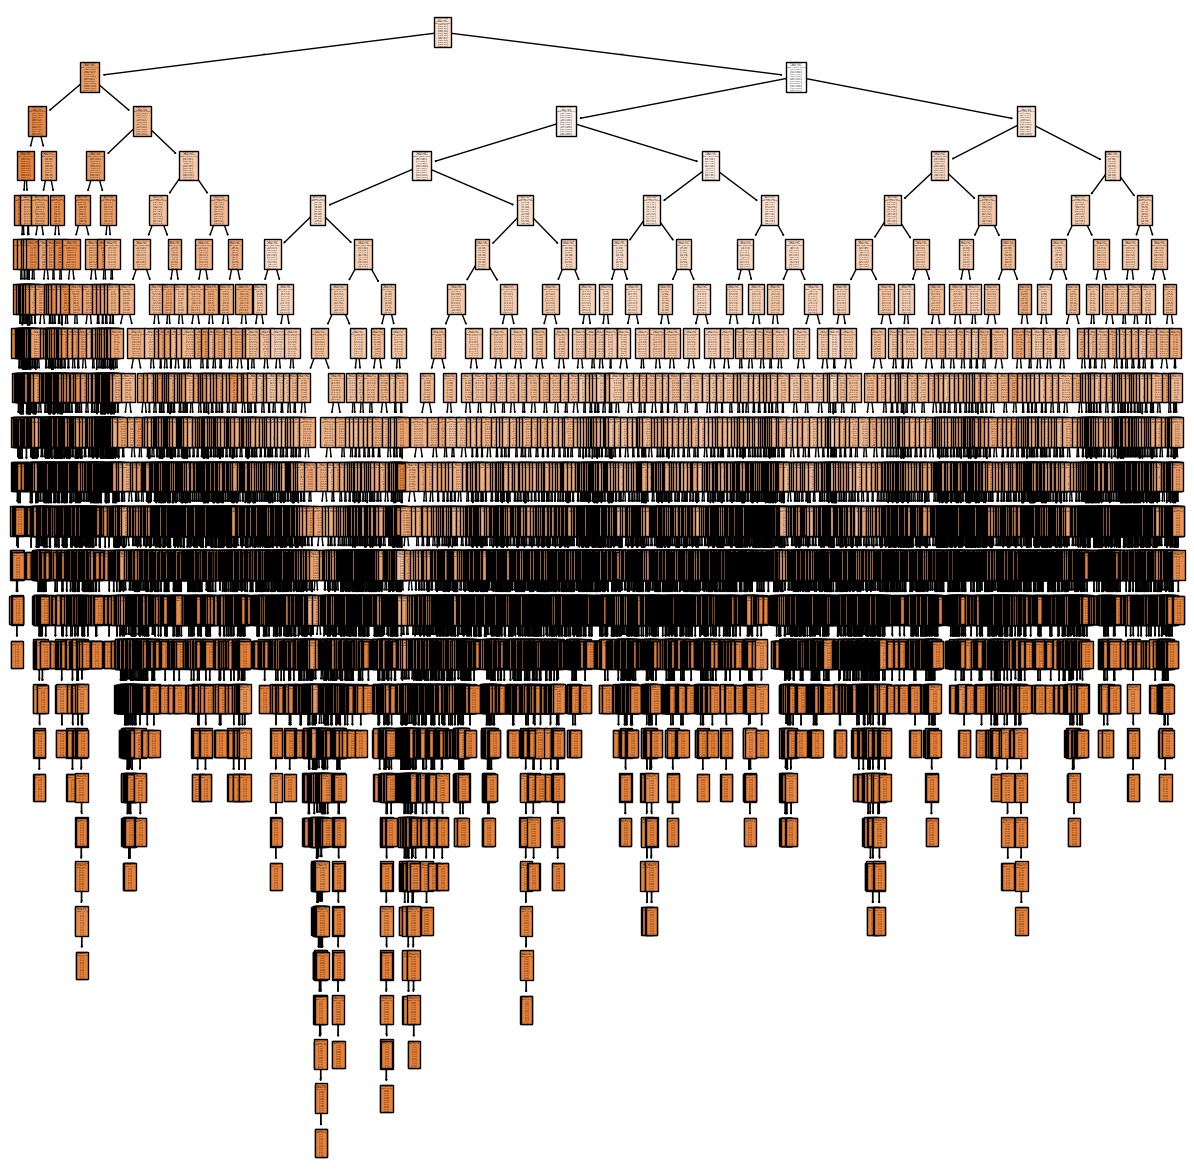

In [28]:
# Run Training Decision Tree classifier

weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(weather_dt, filled=True)
plt.savefig('ML1 1.5A - Decision_Tree_Model_train.png')
plt.show()

In [72]:
# What is the training accuracy score? Using the cross validation method

y_pred_train = weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.6029513252961687


######  INTERPRETATION: The accuracy sits at only 60% with the climatewins_d and pleasant_w datasets.This decision tree is difficult to read due to the large amount of data available. Lets run the testing decision tree and see if it looks different.

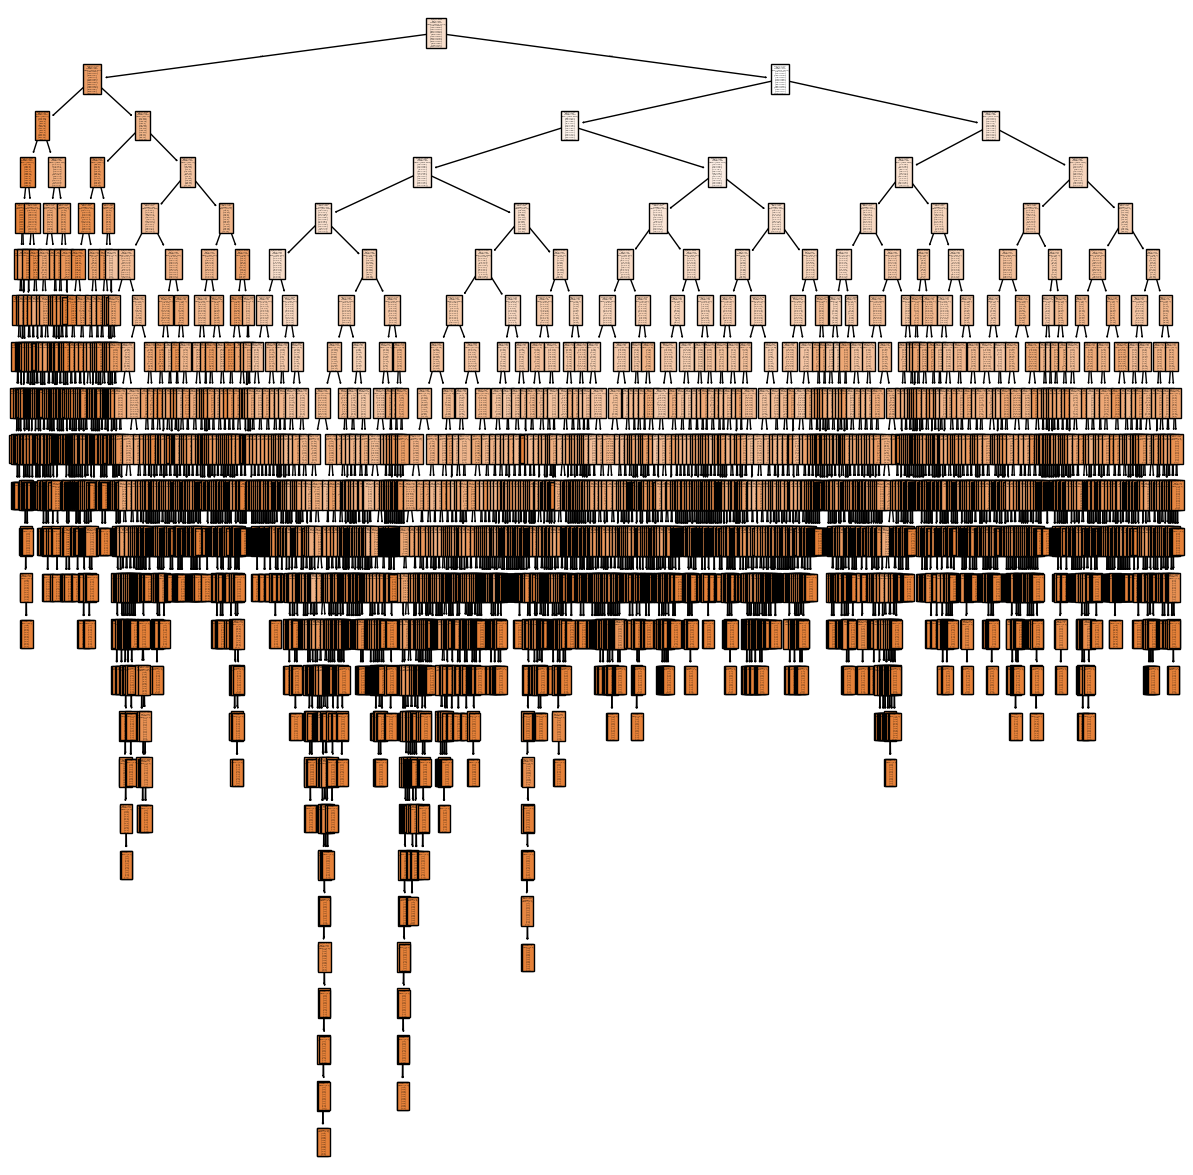

In [74]:
# Run Testing Decision Tree classifier

weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
weather_dt.fit(X_test, y_test)
figure(figsize=(15,15))
tree.plot_tree(weather_dt, filled=True)
plt.savefig('ML1 1.5A - Decision_Tree_Model_test.png')
plt.show()

In [75]:
# What is the testing accuracy score? Using the cross validation method

y_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  1.0


array([[[4338,    0],
        [   0, 1400]],

       [[3776,    0],
        [   0, 1962]],

       [[3900,    0],
        [   0, 1838]],

       [[4637,    0],
        [   0, 1101]],

       [[4507,    0],
        [   0, 1231]],

       [[4570,    0],
        [   0, 1168]],

       [[4815,    0],
        [   0,  923]],

       [[4195,    0],
        [   0, 1543]],

       [[4562,    0],
        [   0, 1176]],

       [[3168,    0],
        [   0, 2570]],

       [[4546,    0],
        [   0, 1192]],

       [[4879,    0],
        [   0,  859]],

       [[4766,    0],
        [   0,  972]],

       [[5462,    0],
        [   0,  276]]], dtype=int64)

###### INTERPRETATION: You can see there is some difference between the training and testing decision tree. The tree is still difficult to read and interpret. Test accuracy reads 100%.

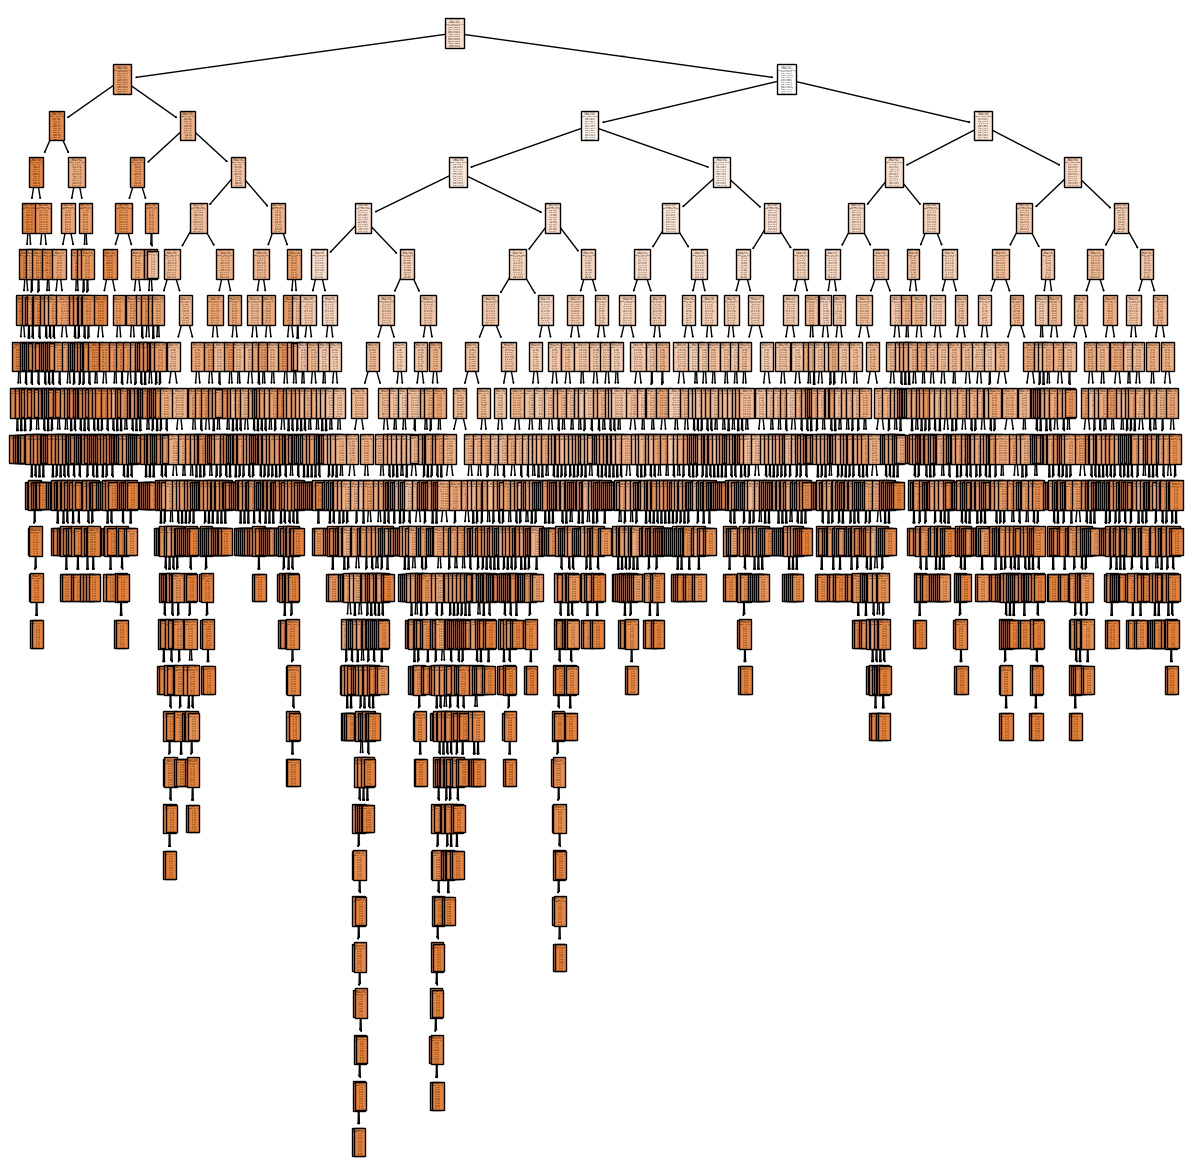

In [77]:
# Run Decision Tree classifier, with additional splits for pruning.

weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=5)
weather_dt.fit(X_test, y_test)
figure(figsize=(15,15))
tree.plot_tree(weather_dt, filled=True)
plt.savefig('ML1 1.5A - Decision_Tree_Model_test_pruning_5split.png')
plt.show()

###### Pruning the decision tree by providing 5 splits changed things visually but only slightly. I will move onto creating confusion matrices. Later in the script I will create smaller decision tress based on subsets of the top 5 areas with pleasant weather. Those top 5 would be Valentia, Olso, Kassel, Stockholm, Debilt.

#### Confusion Matrix

In [80]:
# Generate predictions on the test set

y_pred = weather_dt.predict(X_test)

In [81]:
locations = list({x.split("_")[0] for x in climatewins_d.columns if x not in ["MONTH", "DATE"]})
locations.sort()
locations

['BASEL',
 'BELGRADE',
 'BUDAPEST',
 'DEBILT',
 'DUSSELDORF',
 'HEATHROW',
 'KASSEL',
 'LJUBLJANA',
 'MAASTRICHT',
 'MADRID',
 'MUNCHENB',
 'OSLO',
 'STOCKHOLM',
 'VALENTIA']

In [82]:
# Importing specific library for running multiple confuison matrices

from sklearn.multioutput import MultiOutputClassifier

IndexError: list index out of range

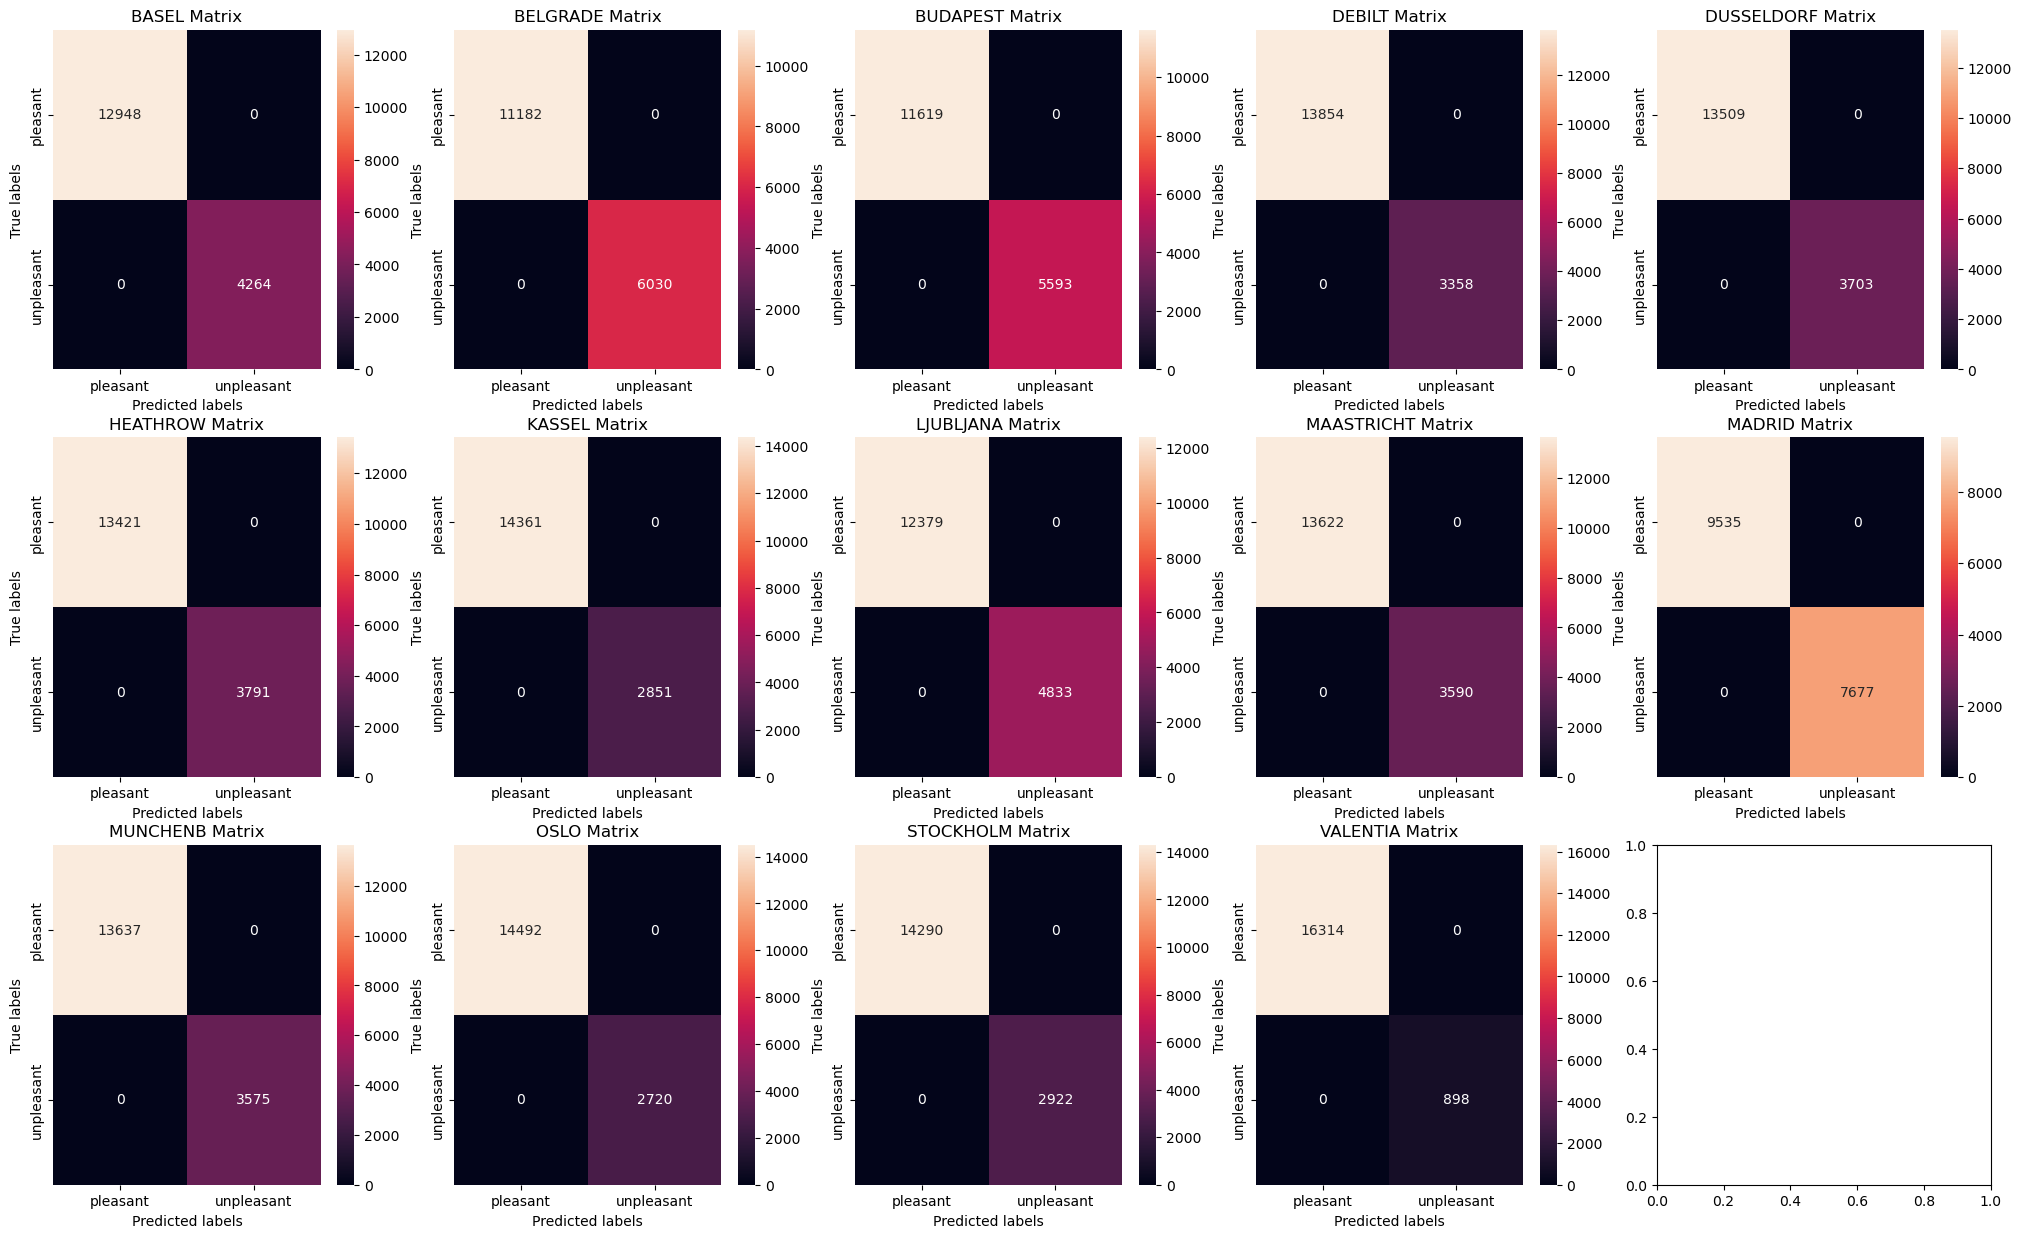

In [83]:
# Training Confusion Matrix

key = "_pleasant_weather"
stations = []
fig_cm_train, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_train.loc[:,name+key], y_pred_train[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        ax[i,j].xaxis.set_ticklabels(labels); 
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.5A - Confusion Matrix_training_climatewins_and_pleasant_weather.png")

IndexError: list index out of range

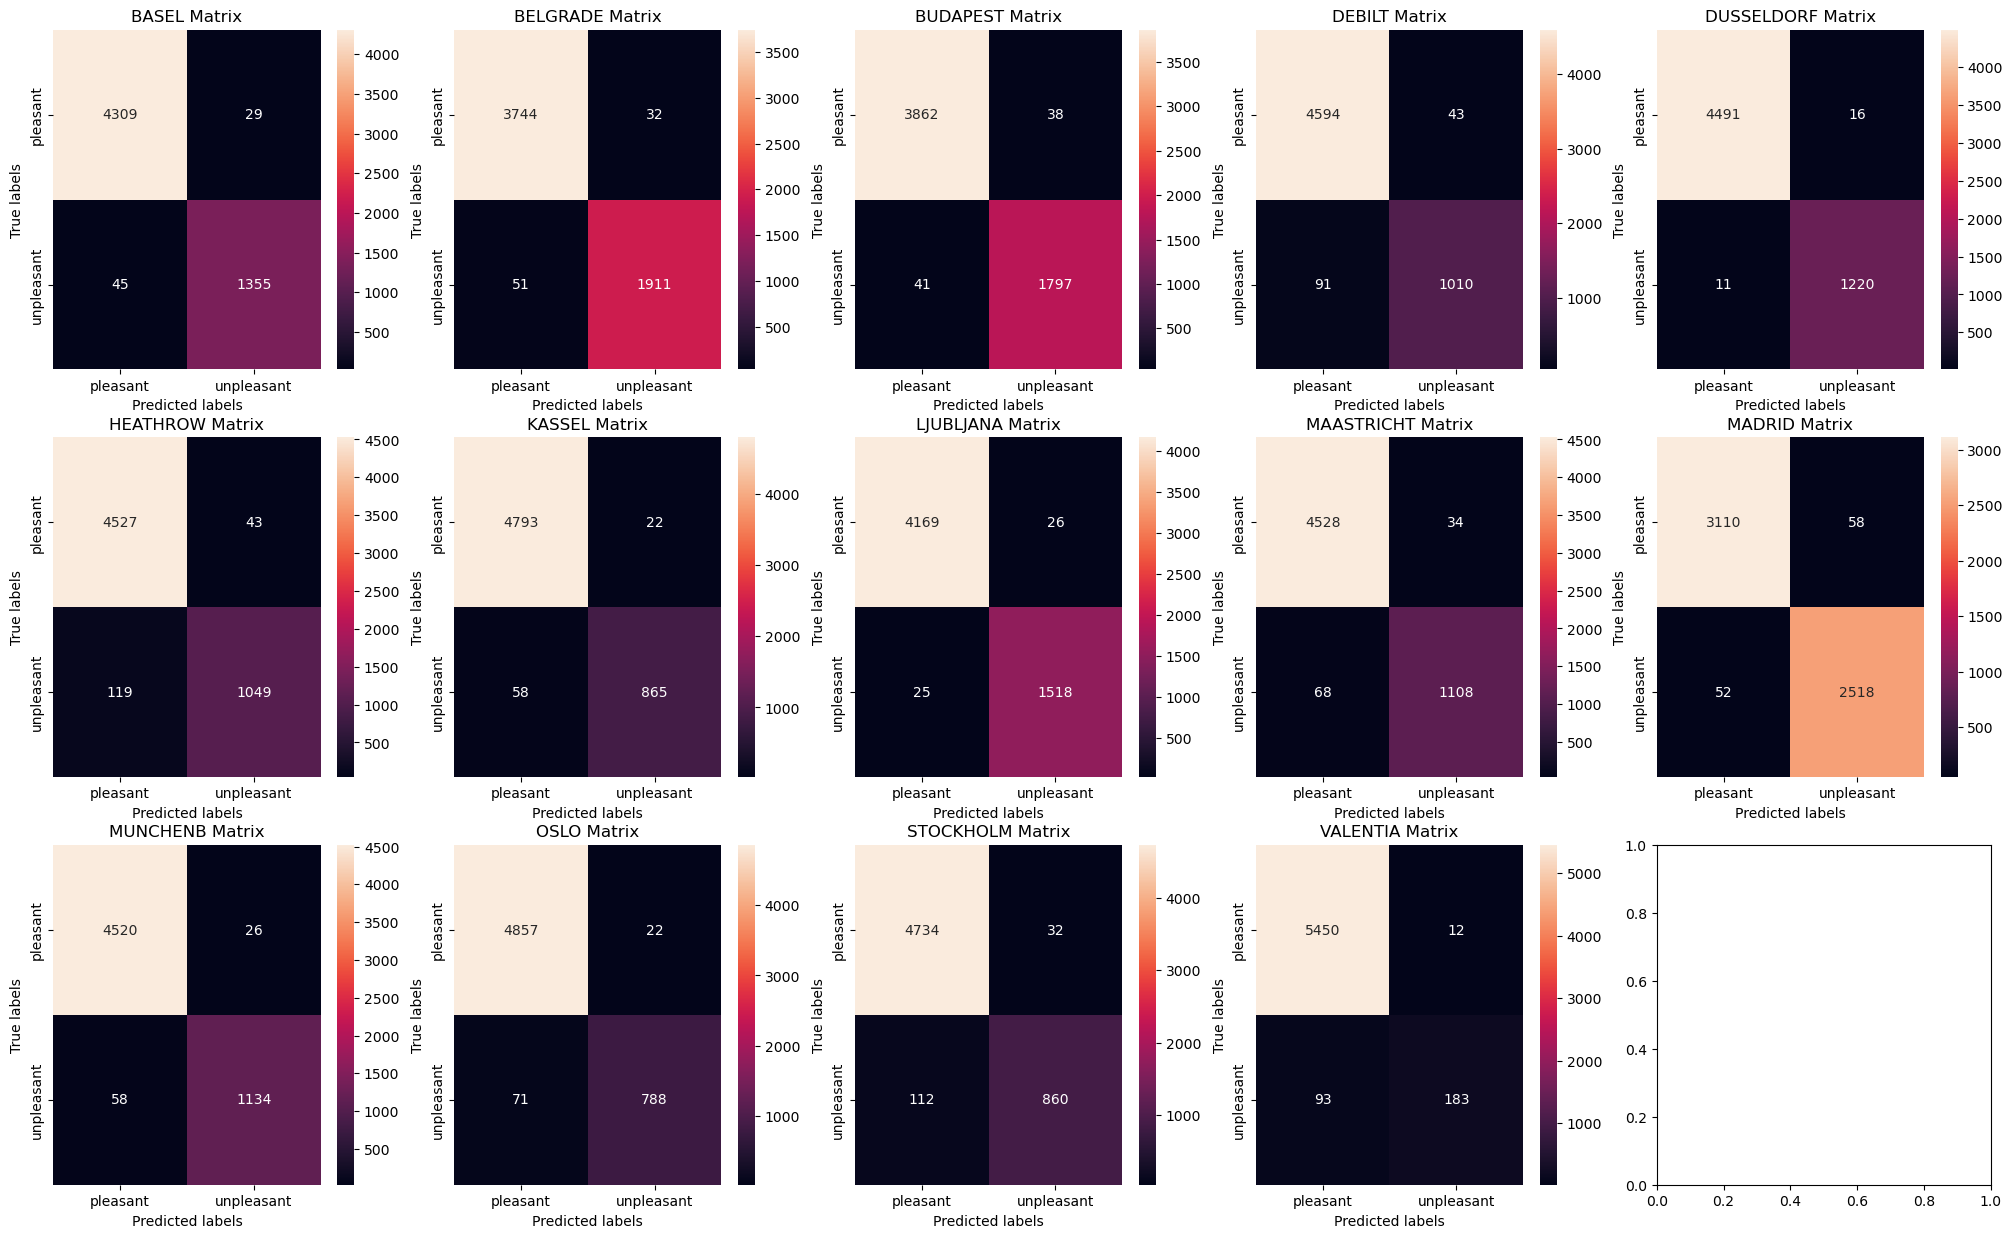

In [127]:
# Testing Confusion Matrix

key = "_pleasant_weather"
stations = []
fig_cm_test, ax = plt.subplots(3, 5, figsize=(25,15))
labels = ['pleasant', 'unpleasant']   
count=0
for i in range(3):
    for j in range(5):
        name = locations[count]
        cm = confusion_matrix(y_test.loc[:,name+key], y_pred[:,count])
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        ax[i,j] = sns.heatmap(cm, annot=True, fmt='g', ax=ax[i,j]);
        # labels, title and ticks
        ax[i,j].set_xlabel('Predicted labels');
        ax[i,j].set_ylabel('True labels'); 
        ax[i,j].set_title(name +' Matrix'); 
        ax[i,j].xaxis.set_ticklabels(labels); 
        ax[i,j].yaxis.set_ticklabels(labels);
        count+=1
        plt.savefig("ML1 1.5A - Confusion Matrix_testing_climatewins_and_pleasant_weather.png")

###### Comparing the training confusion matrix to the testing confusion matrix they aren't off by much. There's a 2-4% difference between the training and the testing matices. I can still determine that the top 5 areas with the most pleasant weather are Valentia, Oslo, Kassel, Stockholm and Debilt. 

In [183]:
# What is the testing accuracy score? Using the cross validation method

y_pred = weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  0.831822934820495


array([[[4309,   29],
        [  45, 1355]],

       [[3744,   32],
        [  51, 1911]],

       [[3862,   38],
        [  41, 1797]],

       [[4594,   43],
        [  91, 1010]],

       [[4491,   16],
        [  11, 1220]],

       [[4527,   43],
        [ 119, 1049]],

       [[4793,   22],
        [  58,  865]],

       [[4169,   26],
        [  25, 1518]],

       [[4528,   34],
        [  68, 1108]],

       [[3110,   58],
        [  52, 2518]],

       [[4520,   26],
        [  58, 1134]],

       [[4857,   22],
        [  71,  788]],

       [[4734,   32],
        [ 112,  860]],

       [[5450,   12],
        [  93,  183]]], dtype=int64)

###### INTERPRETATION: The testing accuracy has only increased by 3% putting the accuracy at 63%. I'll begin subsetting the data to see how it performs.

#### Pruning

In [186]:
# Subsetting climatewins_d dataset containing the top 5 areas with the most pleasant weather (Valentia, Olso, Kassel, Stockholm, Debilt)

top5subset_climatewins = climatewins_d[['DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max',
 'KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',
 'OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max',
 'STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max',
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']]

In [187]:
top5subset_climatewins.shape

(22950, 48)

In [188]:
# Subsetting the pleasant_w dataset containing the top 5 areas with the most pleasant weather (Valentia, Olso, Kassel, Stockholm, Debilt)

top5subset_pleasantw = pleasant_w[['DEBILT_pleasant_weather',
 'KASSEL_pleasant_weather',
 'OSLO_pleasant_weather',
 'STOCKHOLM_pleasant_weather',
 'VALENTIA_pleasant_weather']]

In [189]:
top5subset_pleasantw.shape

(22950, 5)

In [190]:
# Creaitng an "X" matrix

X = top5subset_climatewins
y = top5subset_pleasantw

In [191]:
print(X.shape)
print(y.shape)

(22950, 48)
(22950, 5)


In [192]:
# Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [193]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 48)
(5738, 48)
(17212, 5)
(5738, 5)


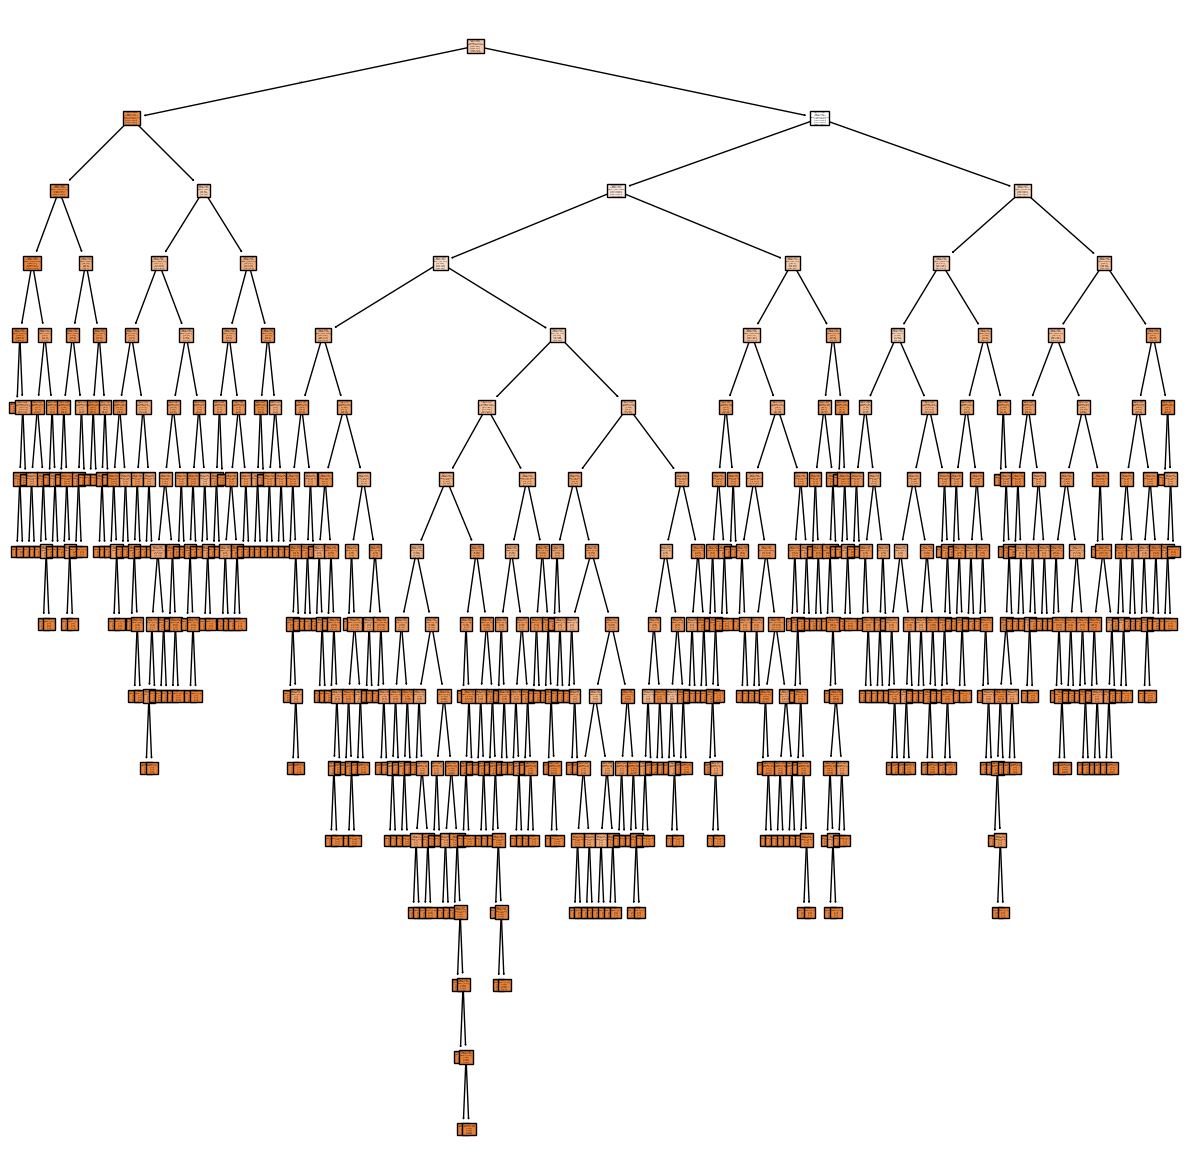

In [194]:
# Run Decision Tree classifier

sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A - Top5Subset_Decision_Tree_Model_train.png')
plt.show()

In [195]:
# What is the training accuracy score? Using the cross validation method

y_pred_train = sub_weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(sub_weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  0.9682200252948867


##### INTERPRETATION: After pruning the original decision tree I've focused on the top 5 areas where pleasant weather is most likely. The training decision tree is easier to read visually however, the values inside the "leaves" are obscured entirely. This could lead to more purning to achieve a smaller tree. When assessing the training accuracy score we were given 0.967464785534894. I can say that there is 96.7% accuracy of the training model.

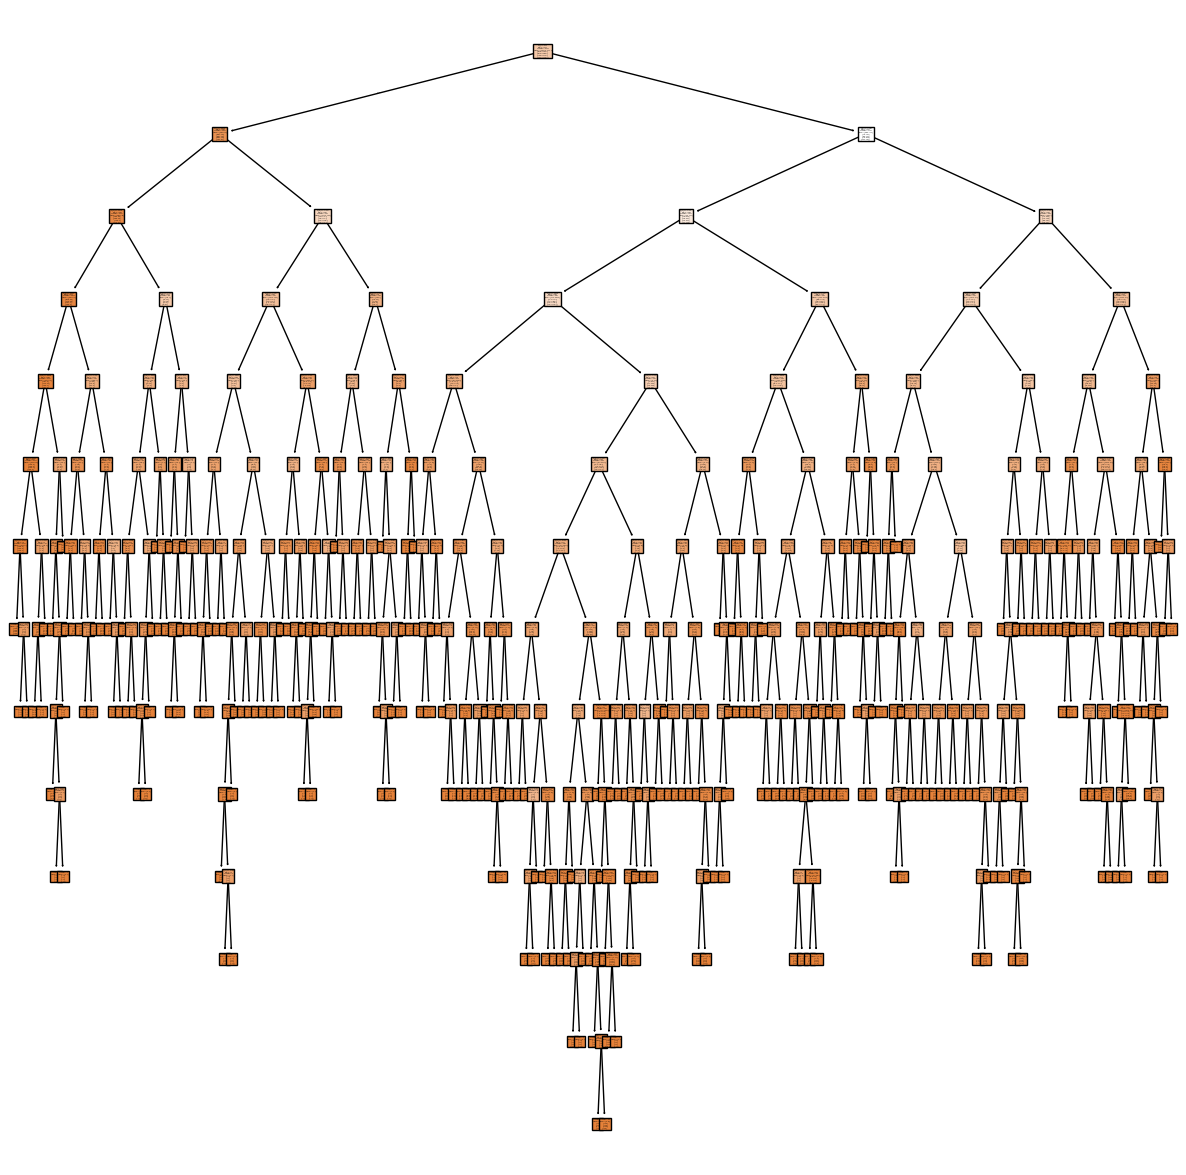

In [197]:
sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_test, y_test)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A - Top5Subset_Decision_Tree_Model_test.png')
plt.show()

In [198]:
# What is the testing accuracy score? Using the cross validation method

y_pred = sub_weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  1.0


array([[[4637,    0],
        [   0, 1101]],

       [[4815,    0],
        [   0,  923]],

       [[4879,    0],
        [   0,  859]],

       [[4766,    0],
        [   0,  972]],

       [[5462,    0],
        [   0,  276]]], dtype=int64)

######  INTERPRETATION: This decision tree is still a bit difficult to read. You can see where the decision tree breaks apart to the individual weather stations but you can't interpret the data because the information within it isn't legible. However, the testin accuracy has reached 1.0 indicating 100%. Running a decision tree on such a large dataset made it difficult but now that we have focused on the top 5 weather stations with the the most pleasant weather we can see improvement with using the decison tree.

#### Individual weather station decision trees

##### Debilt Decision Tree

In [202]:
climate_debilt = top5subset_climatewins[['DEBILT_cloud_cover',
 'DEBILT_wind_speed',
 'DEBILT_humidity',
 'DEBILT_pressure',
 'DEBILT_global_radiation',
 'DEBILT_precipitation',
 'DEBILT_sunshine',
 'DEBILT_temp_mean',
 'DEBILT_temp_min',
 'DEBILT_temp_max']]

In [203]:
pleasant_debilt = top5subset_pleasantw['DEBILT_pleasant_weather']

In [204]:
# Creaitng an "X" matrix

X = climate_debilt
y = pleasant_debilt

In [205]:
print(X.shape)
print(y.shape)

(22950, 10)
(22950,)


In [206]:
# Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [207]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 10)
(5738, 10)
(17212,)
(5738,)


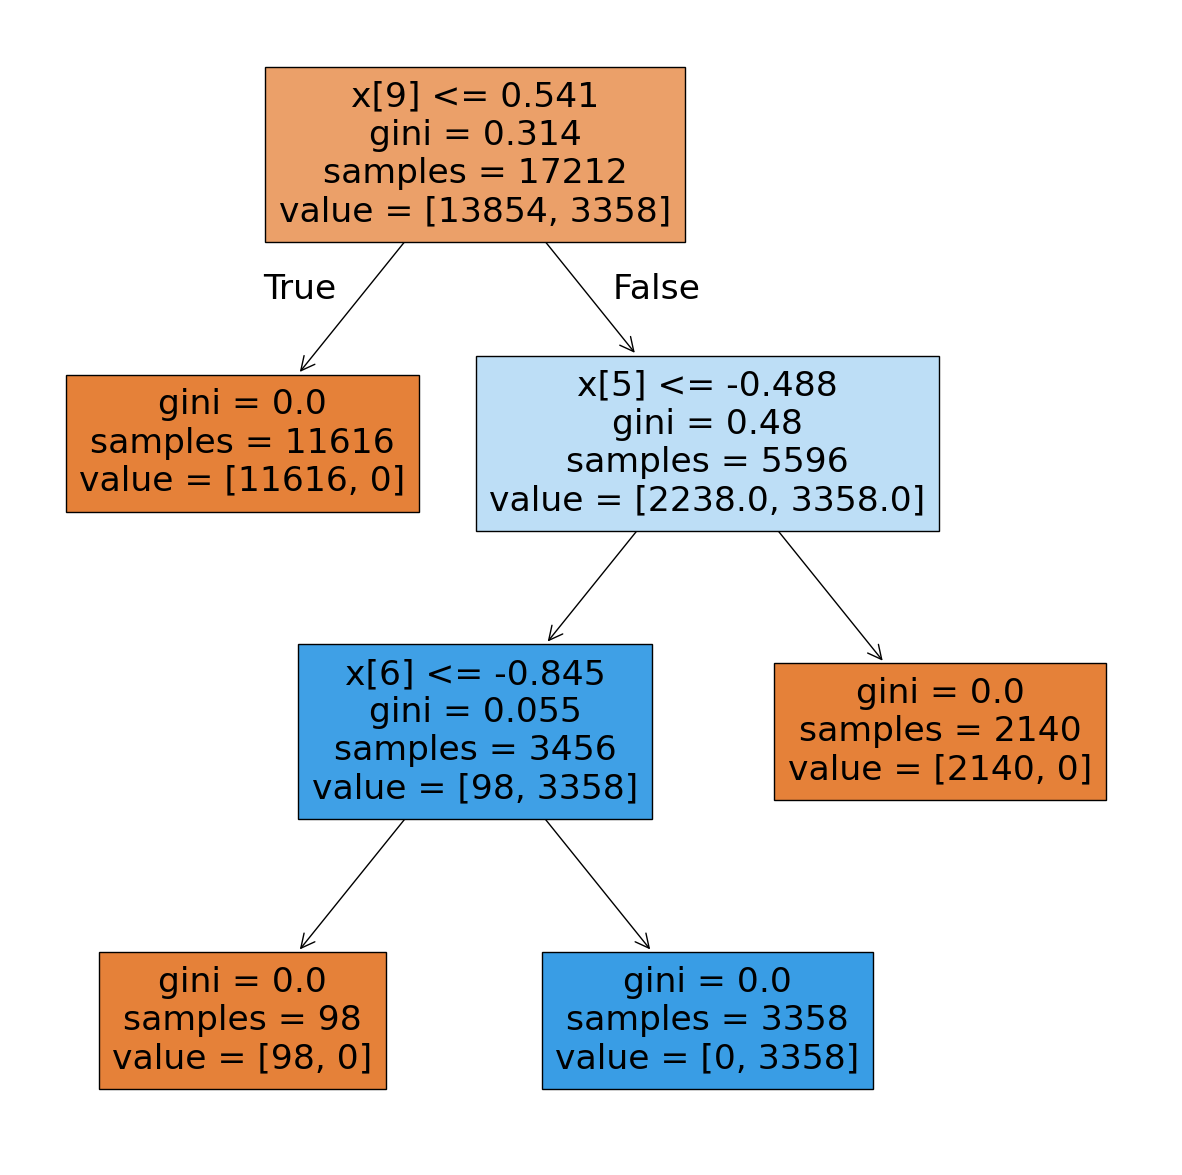

In [208]:
# Run Training Decision Tree classifier

sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A - Debilt_Decision_Tree_Model_train.png')
plt.show()

In [209]:
# What is the training accuracy score? Using the cross validation method

y_pred_train = sub_weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(sub_weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  1.0


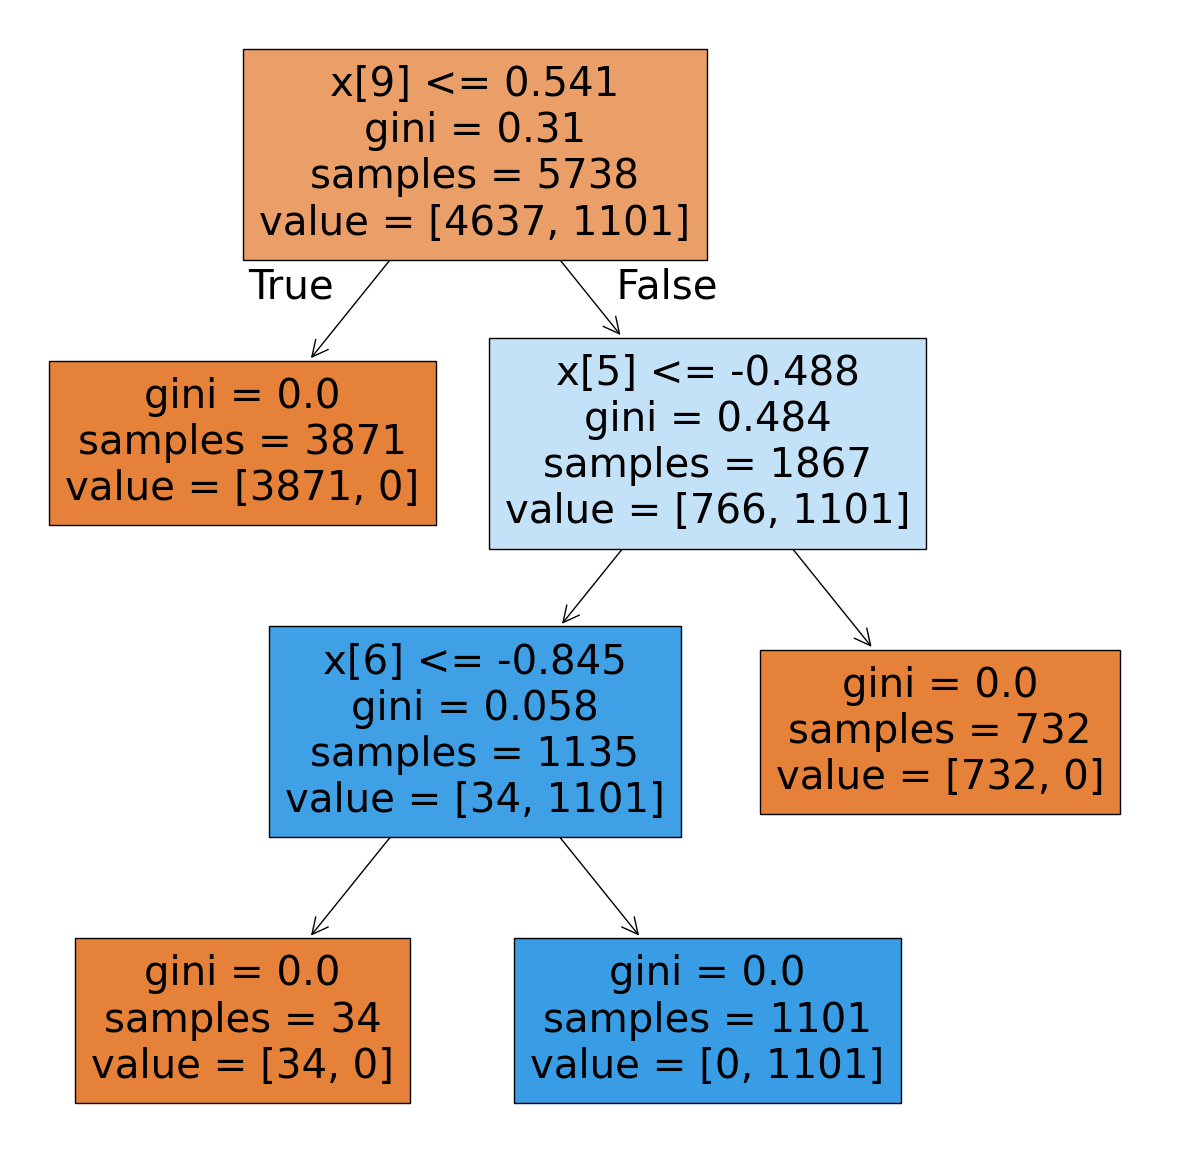

In [210]:
# Run Testing Decision Tree classifier

sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_test, y_test)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A - Debilt_Decision_Tree_Model_test.png')
plt.show()

In [211]:
# What is the testing accuracy score? Using the cross validation method

y_pred = sub_weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)

Test accuracy score:  1.0


array([[[1101,    0],
        [   0, 4637]],

       [[4637,    0],
        [   0, 1101]]], dtype=int64)

##### Kassel Decision Tree

In [213]:
climate_kassel = top5subset_climatewins[['KASSEL_wind_speed',
 'KASSEL_humidity',
 'KASSEL_pressure',
 'KASSEL_global_radiation',
 'KASSEL_precipitation',
 'KASSEL_sunshine',
 'KASSEL_temp_mean',
 'KASSEL_temp_min',
 'KASSEL_temp_max',]]

In [214]:
pleasant_kassel = top5subset_pleasantw['KASSEL_pleasant_weather']

In [215]:
# Creaitng an "X" matrix

X = climate_kassel
y = pleasant_kassel

In [216]:
print(X.shape)
print(y.shape)

(22950, 9)
(22950,)


In [217]:
# Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [218]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 9)
(5738, 9)
(17212,)
(5738,)


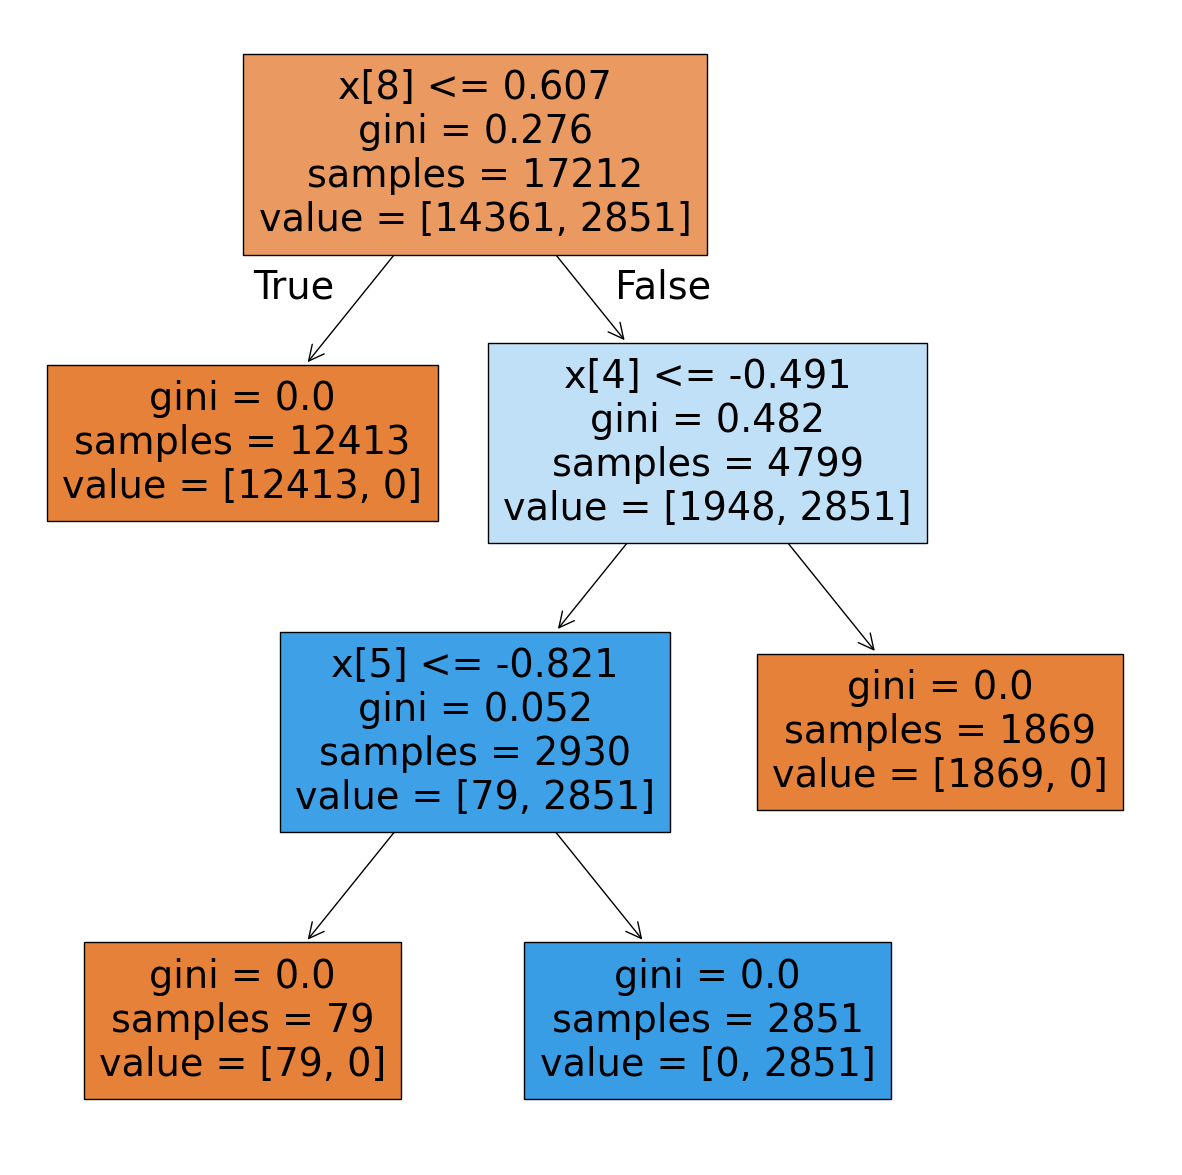

In [219]:
# Run Training Decision Tree classifier

sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A -Kassel_Decision_Tree_Model_train.png')
plt.show()

In [220]:
# What is the training accuracy score? Using the cross validation method

y_pred_train = sub_weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(sub_weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  1.0


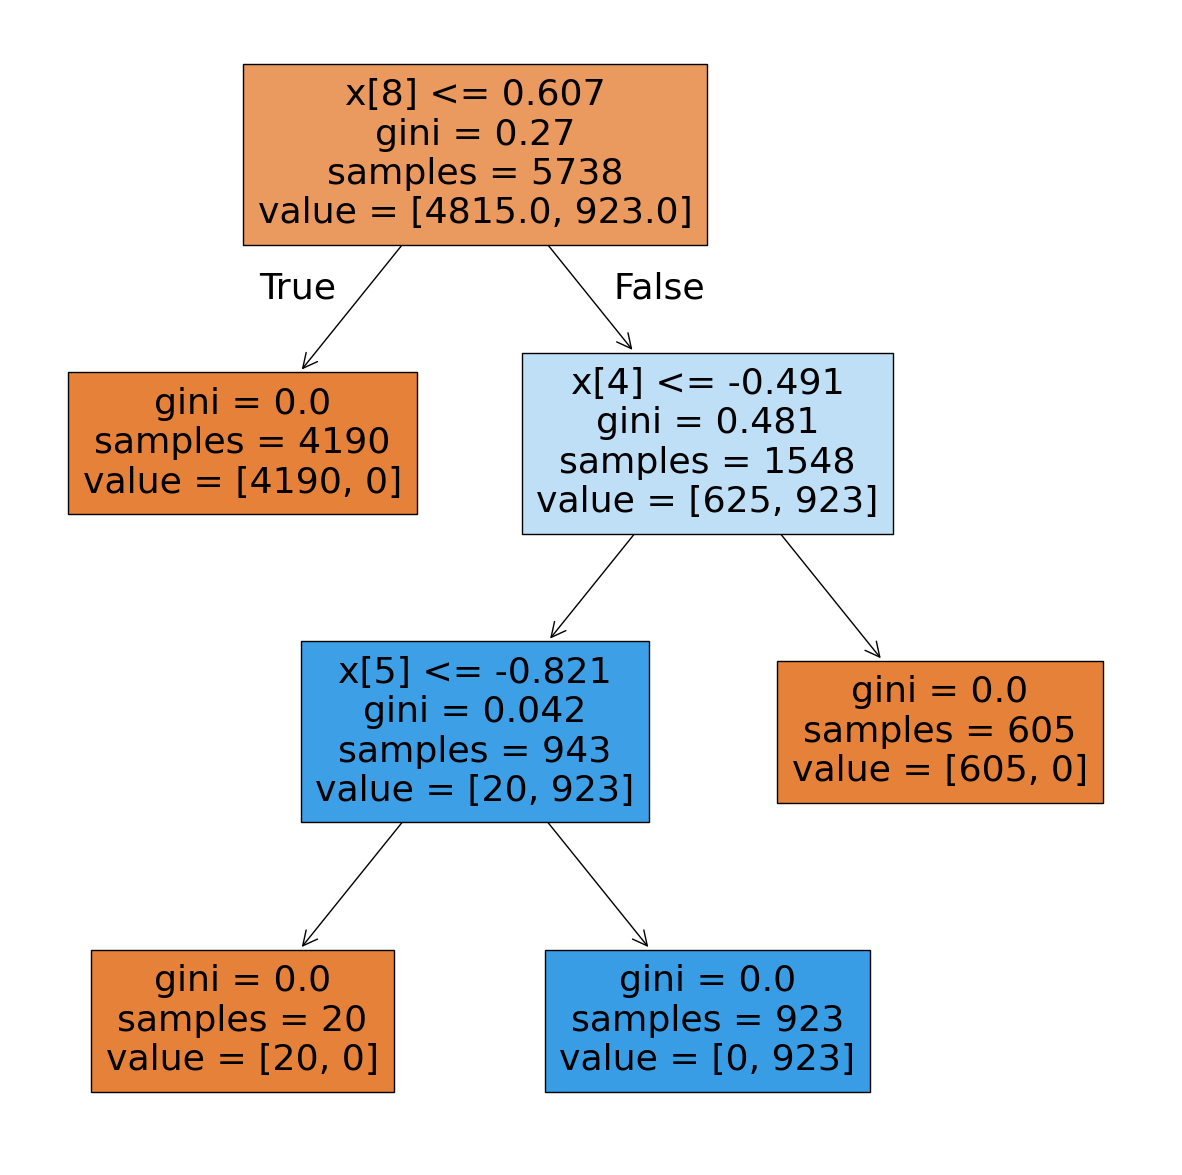

In [221]:
# Run Testing Decision Tree classifier

sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_test, y_test)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A -Kassel_Decision_Tree_Model_test.png')

In [222]:
# What is the testing accuracy score? Using the cross validation method

y_pred = sub_weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)
plt.show()

Test accuracy score:  1.0


##### Oslo Decision tree

In [224]:
climate_oslo = top5subset_climatewins[['OSLO_cloud_cover',
 'OSLO_wind_speed',
 'OSLO_humidity',
 'OSLO_pressure',
 'OSLO_global_radiation',
 'OSLO_precipitation',
 'OSLO_snow_depth',
 'OSLO_sunshine',
 'OSLO_temp_mean',
 'OSLO_temp_min',
 'OSLO_temp_max']]

In [225]:
pleasant_oslo = top5subset_pleasantw['OSLO_pleasant_weather']

In [226]:
# Creaitng an "X" matrix

X = climate_oslo
y = pleasant_oslo

In [227]:
print(X.shape)
print(y.shape)

(22950, 11)
(22950,)


In [228]:
# Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [229]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 11)
(5738, 11)
(17212,)
(5738,)


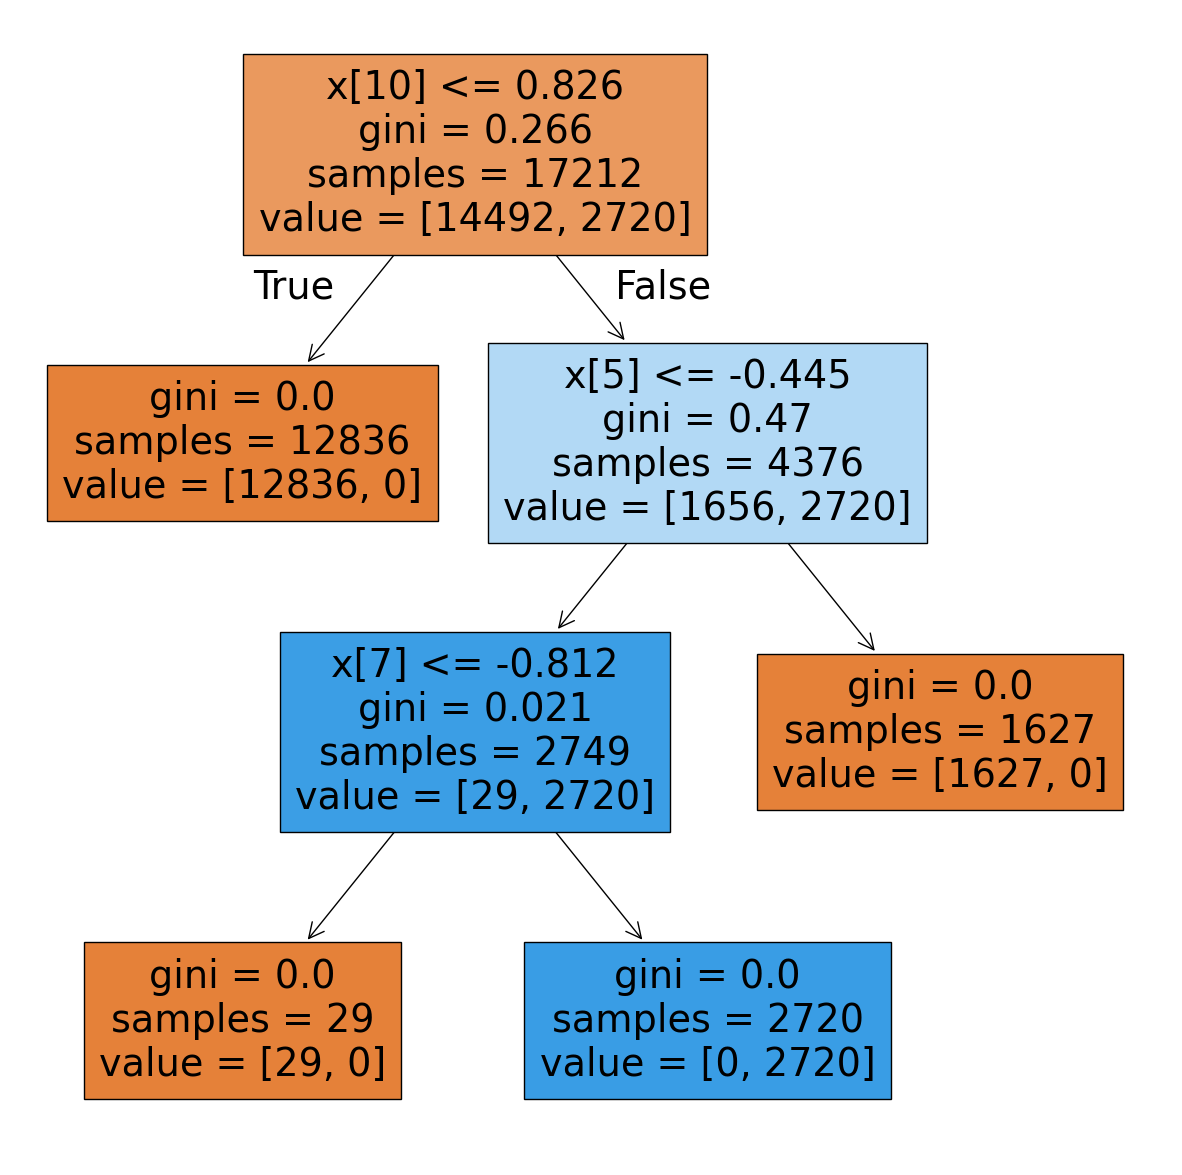

In [230]:
# Run Training Decision Tree classifier

sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A - Oslo_Decision_Tree_Model_train.png')
plt.show()

In [231]:
# What is the training accuracy score? Using the cross validation method

y_pred_train = sub_weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(sub_weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  1.0


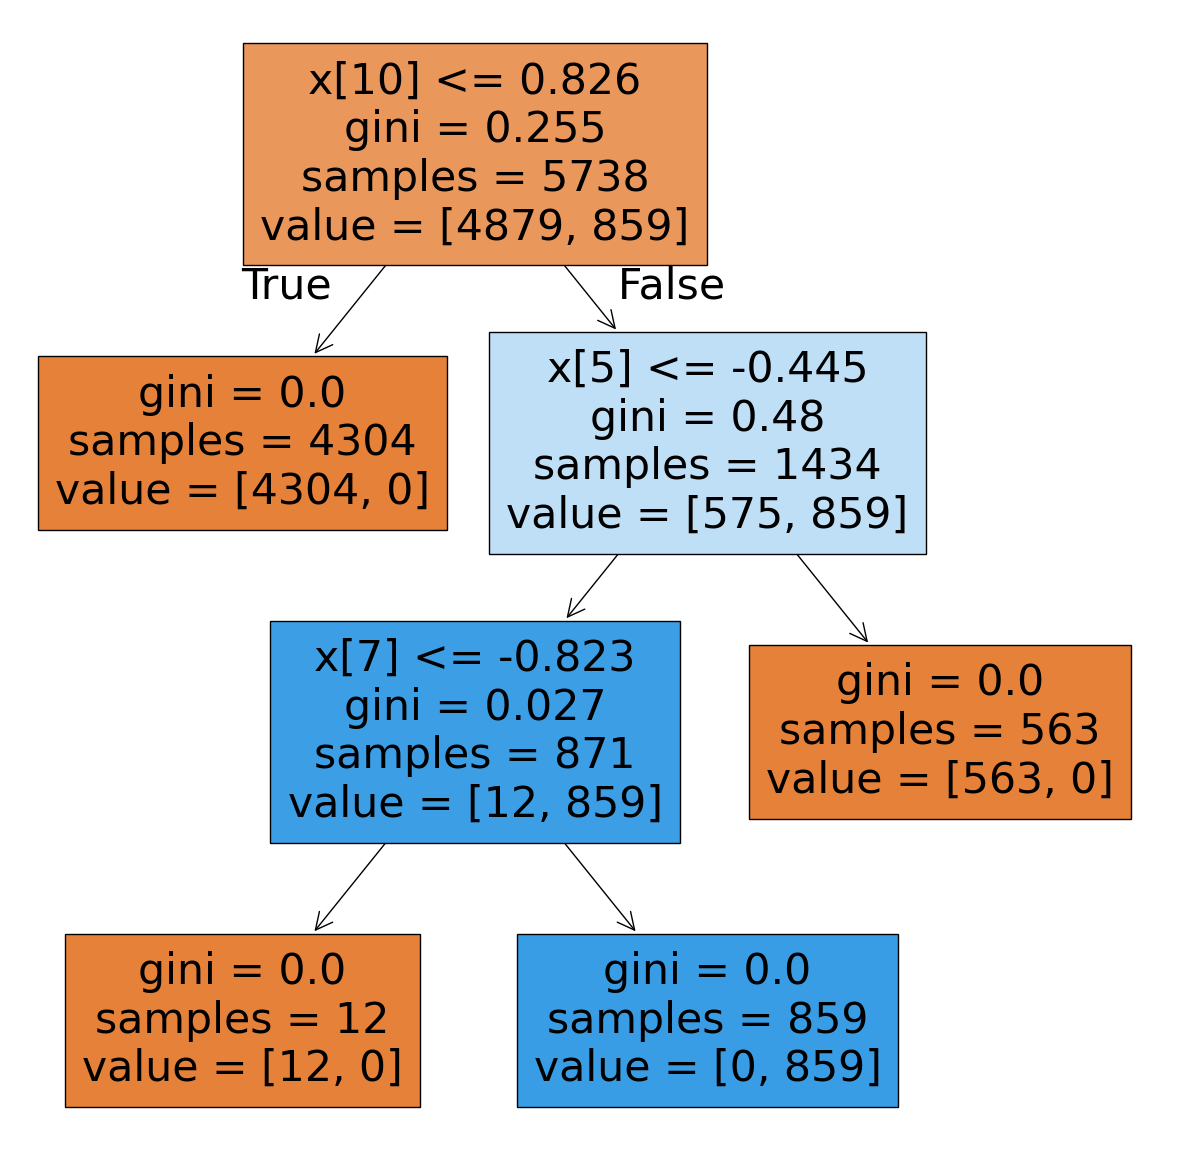

In [232]:
# Run Testing Decision Tree classifier

sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_test, y_test)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A - Oslo_Decision_Tree_Model_test.png')

In [233]:
# What is the testing accuracy score? Using the cross validation method

y_pred = sub_weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)
plt.show()

Test accuracy score:  1.0


##### Stockholm Decision Tree

In [235]:
climate_stockholm = top5subset_climatewins[['STOCKHOLM_cloud_cover',
 'STOCKHOLM_pressure',
 'STOCKHOLM_global_radiation',
 'STOCKHOLM_precipitation',
 'STOCKHOLM_sunshine',
 'STOCKHOLM_temp_mean',
 'STOCKHOLM_temp_min',
 'STOCKHOLM_temp_max']]

In [236]:
pleasant_stockholm = top5subset_pleasantw['STOCKHOLM_pleasant_weather']

In [237]:
# Creaitng an "X" matrix

X = climate_stockholm
y = pleasant_stockholm

In [238]:
print(X.shape)
print(y.shape)

(22950, 8)
(22950,)


In [239]:
# Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [240]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 8)
(5738, 8)
(17212,)
(5738,)


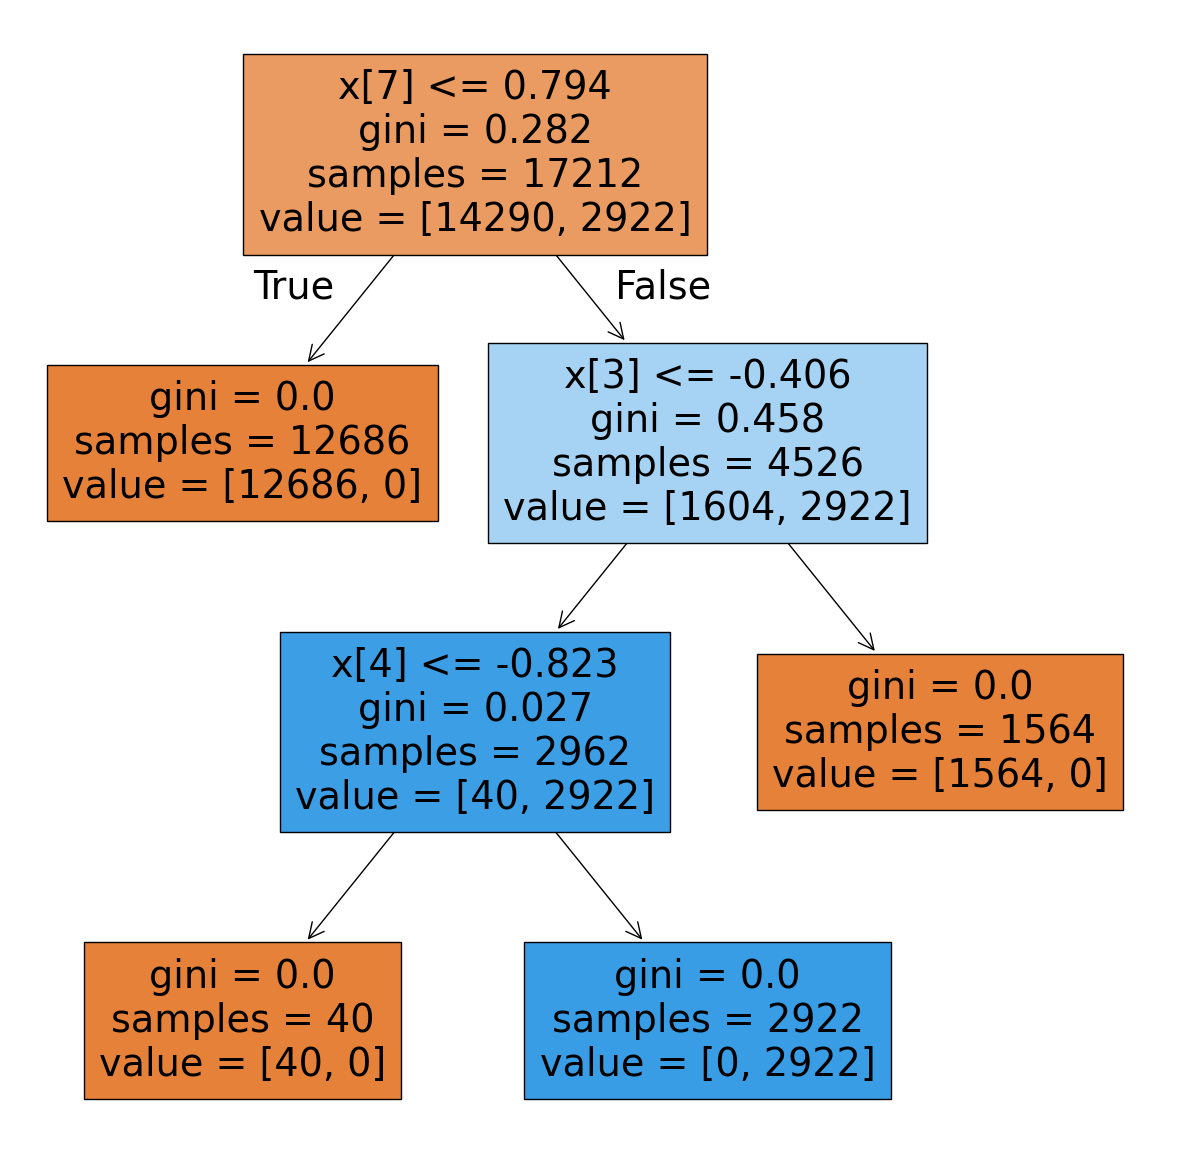

In [241]:
# Run Training Decision Tree classifier

sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A - Stockholm_Decision_Tree_Model_train.png')
plt.show()

In [242]:
# What is the training accuracy score? Using the cross validation method

y_pred_train = sub_weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(sub_weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  1.0


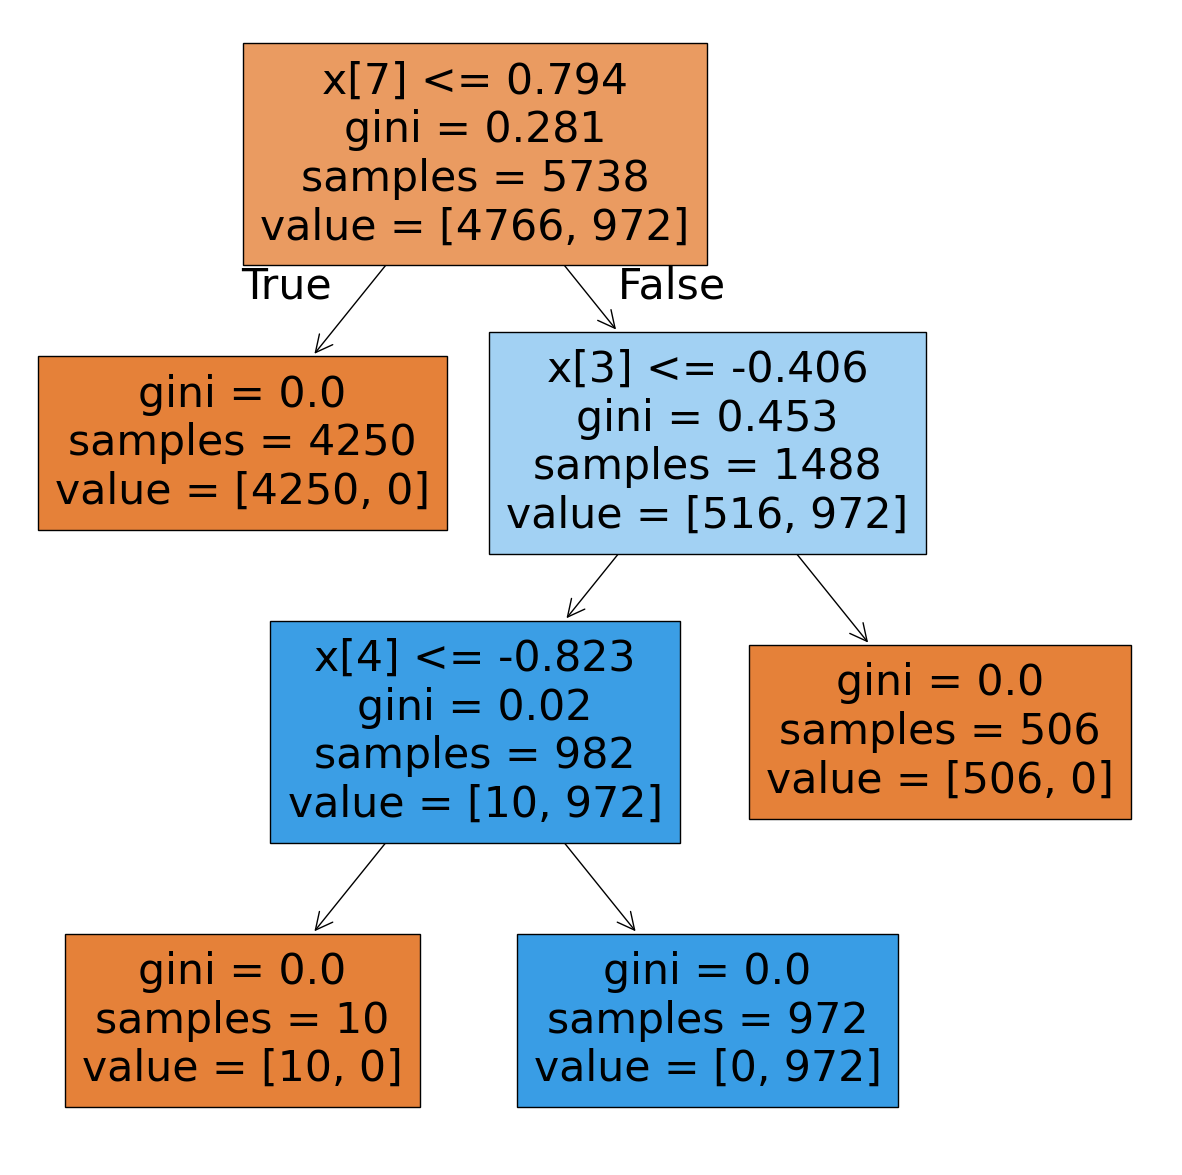

In [243]:
# Run Testing Decision Tree classifier

sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_test, y_test)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A - Stockholm_Decision_Tree_Model_test.png')

In [244]:
# What is the testing accuracy score? Using the cross validation method

y_pred = sub_weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)
plt.show()

Test accuracy score:  1.0


##### Velentia Decision Tree

In [246]:
climate_valentia = top5subset_climatewins[[
 'VALENTIA_cloud_cover',
 'VALENTIA_humidity',
 'VALENTIA_pressure',
 'VALENTIA_global_radiation',
 'VALENTIA_precipitation',
 'VALENTIA_snow_depth',
 'VALENTIA_sunshine',
 'VALENTIA_temp_mean',
 'VALENTIA_temp_min',
 'VALENTIA_temp_max']]

In [247]:
pleasant_valentia = top5subset_pleasantw['VALENTIA_pleasant_weather']

In [248]:
# Creaitng an "X" matrix

X = climate_valentia
y = pleasant_valentia

In [249]:
print(X.shape)
print(y.shape)

(22950, 10)
(22950,)


In [250]:
# Split data into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [251]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17212, 10)
(5738, 10)
(17212,)
(5738,)


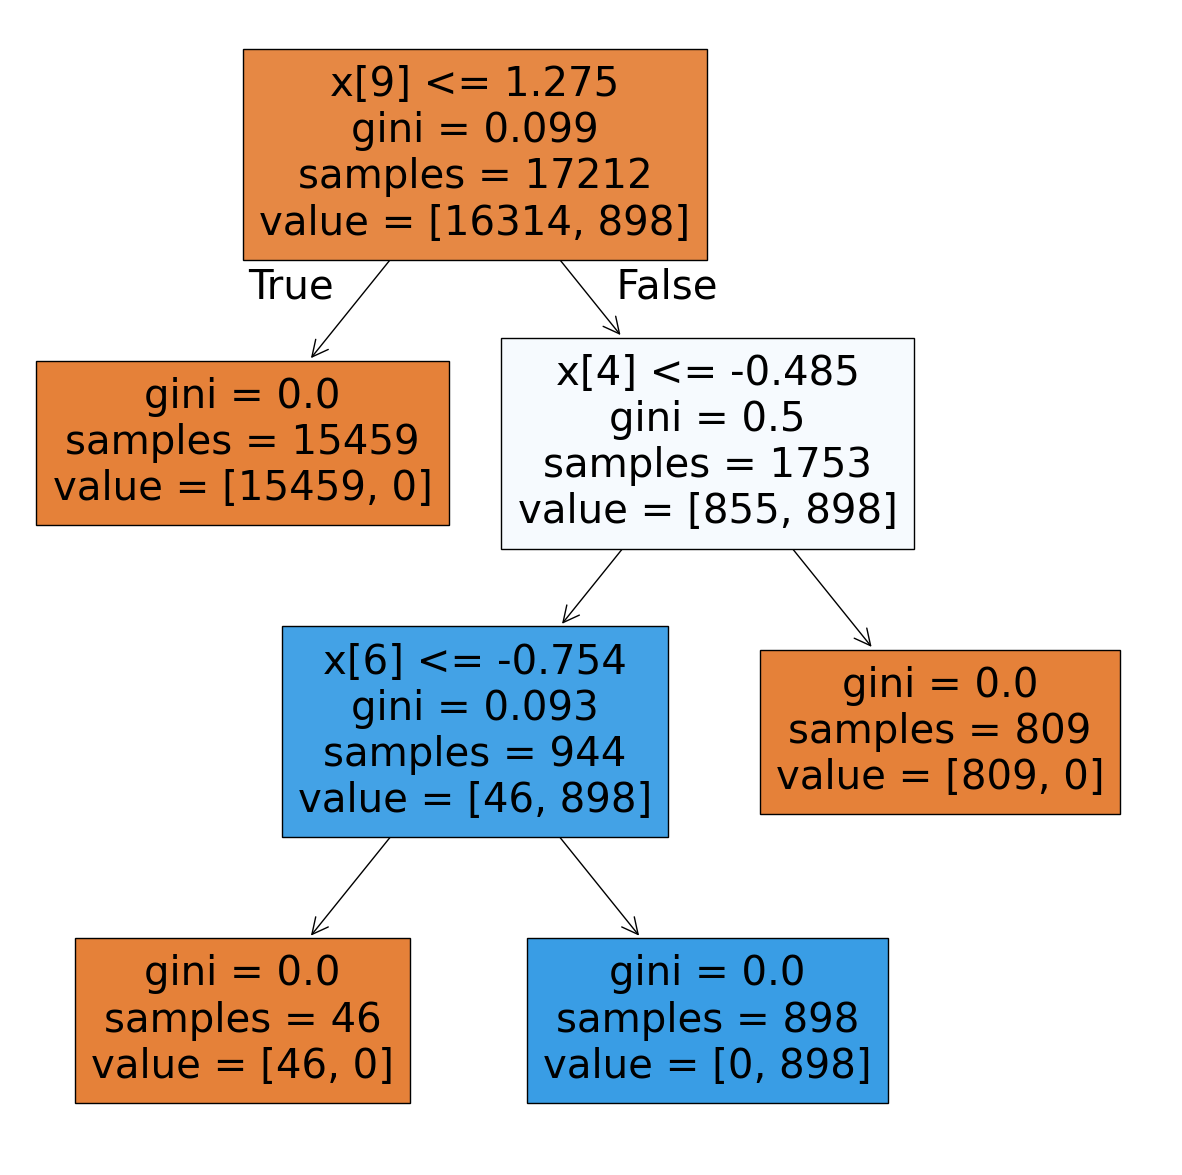

In [252]:
# Run Training Decision Tree classifier

sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_train, y_train)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A - Valentia_Decision_Tree_Model_train.png')
plt.show()

In [253]:
# What is the training accuracy score? Using the cross validation method

y_pred_train = sub_weather_dt.predict(X_train)
print('Train accuracy score: ',cross_val_score(sub_weather_dt, X_train, y_train, cv = 3, scoring='accuracy').mean())

Train accuracy score:  1.0


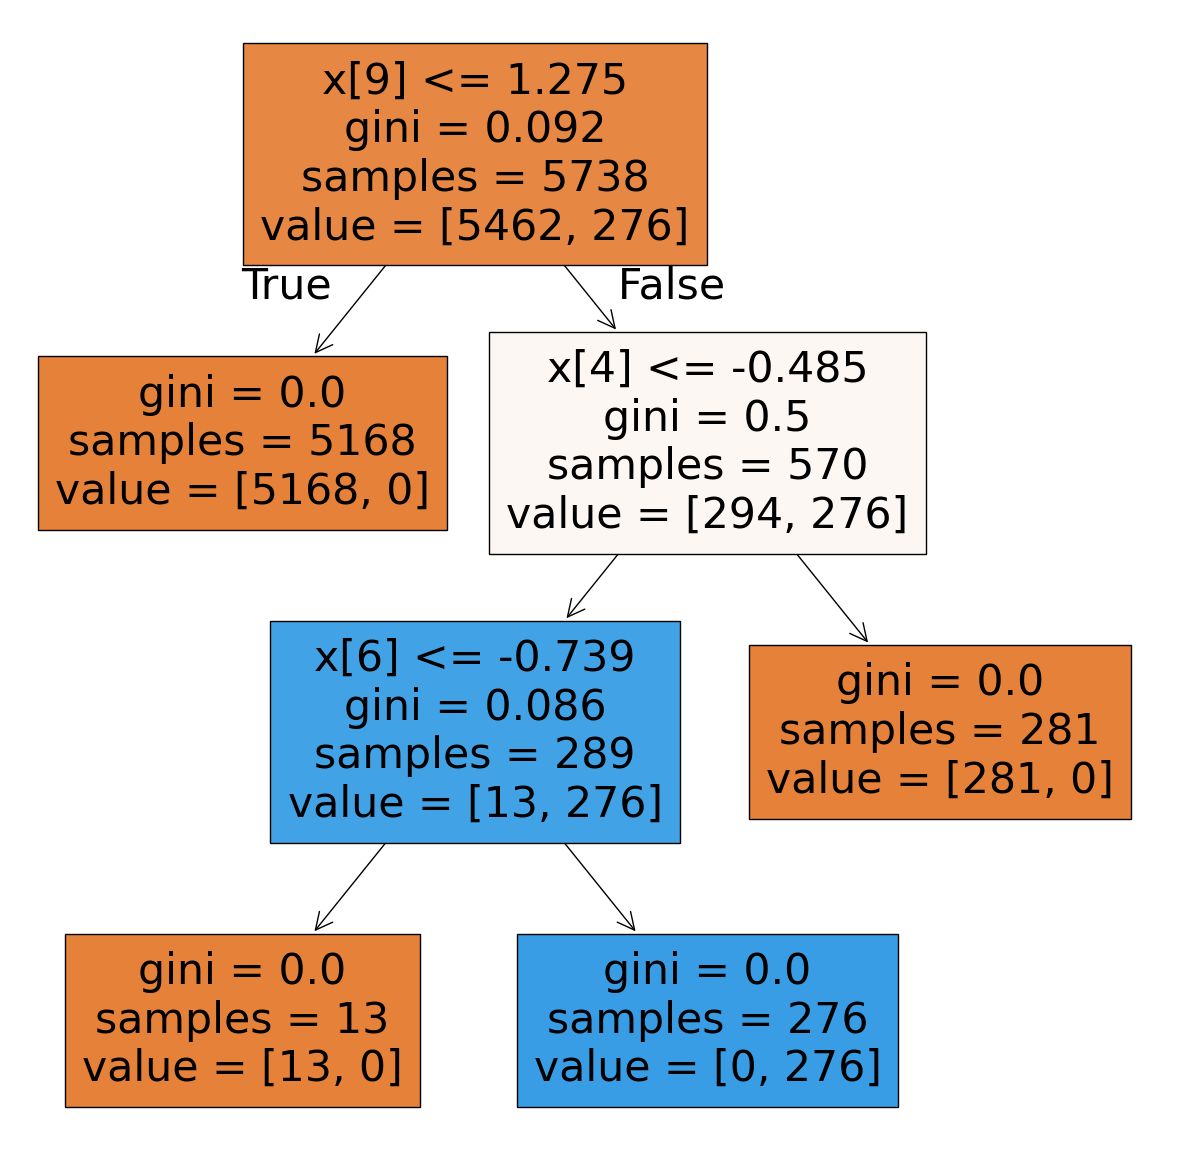

In [254]:
# Run Testing Decision Tree classifier

sub_weather_dt = DecisionTreeClassifier(criterion='gini', min_samples_split=2)
sub_weather_dt.fit(X_test, y_test)
figure(figsize=(15,15))
tree.plot_tree(sub_weather_dt, filled=True)
plt.savefig('ML1 1.5A - Valentia_Decision_Tree_Model_test.png')

In [255]:
# What is the testing accuracy score? Using the cross validation method

y_pred = sub_weather_dt.predict(X_test)
print('Test accuracy score: ',accuracy_score(y_test, y_pred))
multilabel_confusion_matrix(y_test, y_pred)
plt.show()

Test accuracy score:  1.0


###### INTERPRETATION: All 5 weather stations (Debilt, Kassel, Oslo, Stockholm, Valentia) had training and testing decision trees meeting 100%. This is most likely due to the subsets being so small that the decision tree is able to accurately assign a value to it's own leaf. However, this may be causing the algorithm to be overfitting the data because it's so small. 

#### Looking into Regularization/Regression

In [272]:
# Importing proper libraries for regression

import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

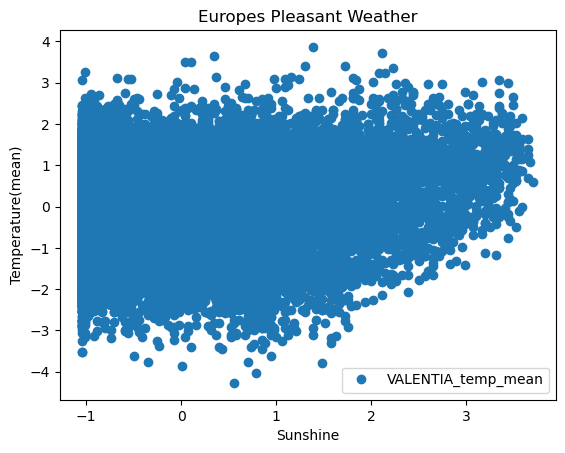

In [280]:
# Prepping for regression of climatewins_d dataset
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

climatewins_d.plot(x = 'VALENTIA_sunshine', y='VALENTIA_temp_mean',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Europes Pleasant Weather')  
plt.xlabel('Sunshine')  
plt.ylabel('Temperature(mean)')
plt.savefig('ML1 1.5A - scatterplot for regression.png')
plt.show()

###### Using our climatewins_d dataset and just using two variable to create a scatterplot we can see that our data is very far from being linear. Diving into regularization for our large dataset would take a great deal of time. If we were to use this data set to further define it's regression we would first need to try to get the data as linear as possible. We'd then need to work with it's regression and that may involve removing data so that there isn't a lot of noise for the algorithm to train on. Finally, after stabilizing the data we could run our training and testing regularization.

### 4. Export

In [282]:
climatewins_d.to_pickle(os.path.join(path, 'ClimateWins', 'Prepared Python Files', 'ML1 1.5_decision_tree_climate_pt1.pkl'))

In [284]:
pleasant_w.to_pickle(os.path.join(path, 'ClimateWins', 'Prepared Python Files', 'ML1 1.5_decision_tree_pleasant_pt1.pkl'))